In [1]:
# Importing all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando os dados de 3 classes.

A matrix $\textbf{X}$ retornada pela função `make_blobs` tem dimensões $N \times K$, onde $K=2$, ou seja, atributos $x_1$ e $x_2$.

In [3]:
# Number of examples.
N = 1000

# Create a 3-class dataset for classification.
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plotando as 3 classes.

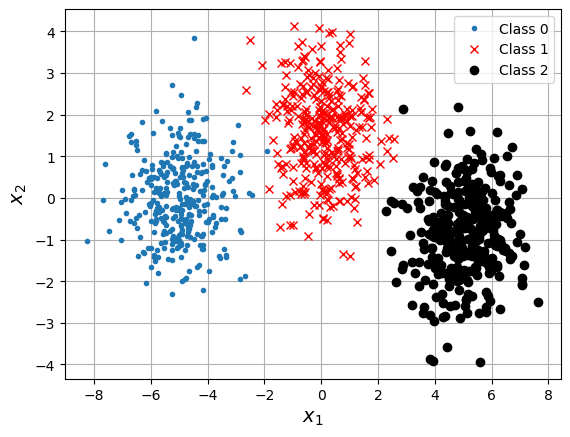

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

#### Qual seria o formato mais apropriado para as funções discriminantes?

### Dividindo os dados em conjuntos de treinamento e validação.

In [5]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

### Alterando as matrizes de atributos de treinamento e validação para que implementem o formato apropriado da função discriminante.

Como vimos, o formato mais apropriado para as funções discriminantes é o de uma reta, conforme mostrado abaixo.

$$g(\textbf{x}) = a_0 + a_1x_1 + a_2x_2,$$

onde $a_0$ é o peso de bias e é sempre feito igual a 1.

Em formato matricial ela é definida como

$$g(\textbf{X}) = \textbf{Xa},$$

onde $\textbf{a}$ e $\textbf{X}$ são um vetor e uma matriz, respectivamente.

In [6]:
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

X_test = np.c_[np.ones((len(y_test), 1)), X_test]

### Treinando o regressor softmax.

**Observações**:

+ A classe `LogisticRegression` usa a abordagem **um-contra-o-resto** por **padrão** quando se treina com conjuntos com mais de duas classes, mas pode-se definir o parâmetro `multi_class` como `multinomial` para alternar para a **Regressão Softmax**.
<br/><br/>

+ A classe `LogisticRegression` aplica regularização L2 por padrão, que pode ser desabilitada com o parâmetro `penalty=None`. 
<br/><br/>

+ A regularização L2 evita que um modelo muito complexo se sobreajuste aos dados de treinamento.
<br/><br/>

+ Porém, como estamos utilizando o formato apropriado para as funções discriminantes, podemos desabilitar a regularização.

In [7]:
# Instantiate Logistic classifier.
classifier = LogisticRegression(multi_class='multinomial', penalty=None, random_state=seed)

# Train the model.
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None, random_state=42)

### Calculando a acurácia do classificador.

In [8]:
# Calculate accuracy of class predictions.
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Acurácia:', acc)

Acurácia: 0.992


### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

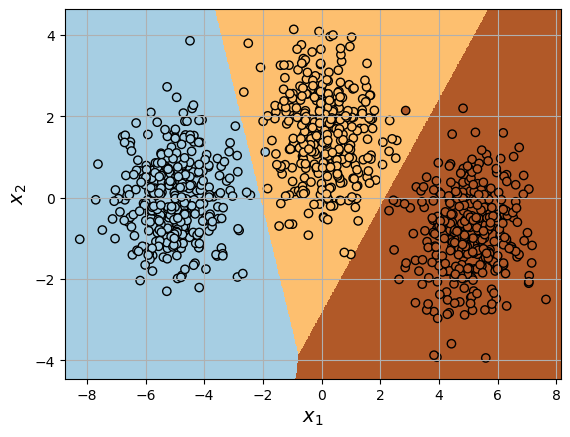

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = classifier.predict(attribute_matrix)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.show()

### Plotando a matriz de confusão.

**OBS**.: Para plotar a matriz de confusão, neste exemplo, usamos todos os dados gerados pela função `make_blobs`, mas como a função retorna uma matriz com apenas os atributos $x_1$ e $x_2$, nós precisamos concatenar o vetor de bias para criarmos uma matriz de atributos que siga o formato da função discriminante, que no caso deste exemplo, é uma reta.

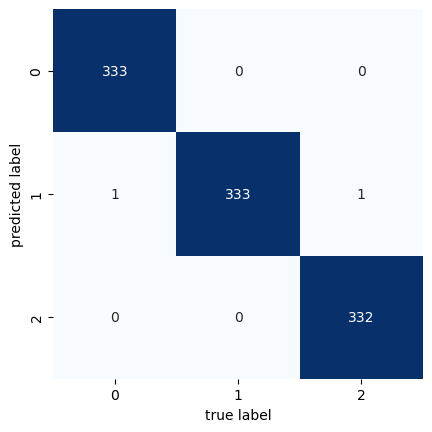

In [10]:
# Predicting with the whole dataset.
y_pred = classifier.predict(np.c_[np.ones((len(y), 1)), X])

# Plot the confusion matrix
fig = plt.figure()
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(0,3), yticklabels=range(0,3), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()